In [1]:
import pandas as pd 
import numpy as np
import nltk
import re 
import os 
import random 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv('/content/all_data.csv')

In [3]:
data.head()

,review,sentiment
0,Aditya Ingole Deaf,2
1,I love the app.! There is no issue but if u co...,1
2,"So hard to use. The web app failed, and the mo...",0
3,I hate that the app makes a sound every time s...,1
4,Useless at BSE star MF meet.voice too mych slo...,0


In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer 
from nltk.tokenize import RegexpTokenizer

stopwords = stopwords.words('english')
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+')

# As this dataset is fetched from twitter so it has lots of people tag in tweets
# we will remove them 
tags = r"@\w*"


def preprocess_text(sentence, stem = True):
    sentence = tokenizer.tokenize(sentence)
    # sentence = sentence.split()

    # sentence = [re.sub(tags, "", sentence)]
    

    text = []
    # print(sentence)
    for word in sentence:
        word = word.lstrip()
        word = word.rstrip()
        word = word.replace(' ','')
        if word not in stopwords:
            
            if stem:
                text.append(stemmer.stem(word).lower())
            else:
                text.append(word.lower())
                
    return tokenizer.tokenize(" ".join(text))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
print(f"Orignal Text : {data.review[11]}")
print()
print(f"Preprocessed Text : {preprocess_text(data.review[11])}")

Orignal Text : Very disappointed to know that Zoom virtual background is not supporting tablet

Preprocessed Text : ['veri', 'disappoint', 'know', 'zoom', 'virtual', 'background', 'support', 'tablet']


In [7]:
data.review = data.review.map(preprocess_text)
data.head()

,review,sentiment
0,"[aditya, ingol, deaf]",2
1,"[i, love, app, there, issu, u, could, add, fea...",1
2,"[so, hard, use, the, web, app, fail, mobil, ap...",0
3,"[i, hate, app, make, sound, everi, time, someo...",1
4,"[useless, bse, star, mf, meet, voic, mych, slo...",0


In [8]:
# vocabulary of words present in dataset
data_vocab = []
for text in data.review:
    for word in text:
        if word not in data_vocab:
            data_vocab.append(word)

In [9]:
len(data_vocab)

13399

In [5]:
from collections import Counter
import random
from termcolor import colored
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.model_selection import train_test_split


x = data.review
y = data.sentiment
print(f'DATA : {x[0]}')
print(f'LABEL: {y[0]}')

DATA : Aditya Ingole Deaf
LABEL: 2


In [26]:
data["review"]=data["review"].apply(lambda x: " ".join(x) )
# x_test[text]=x_test[text].apply(lambda x: " ".join(x) )

In [6]:
data.head()

,review,sentiment
0,Aditya Ingole Deaf,2
1,I love the app.! There is no issue but if u co...,1
2,"So hard to use. The web app failed, and the mo...",0
3,I hate that the app makes a sound every time s...,1
4,Useless at BSE star MF meet.voice too mych slo...,0


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=y, random_state=42)

In [14]:
x_train.head()

33708                                   it better zoom app
19367    can add function hide icon it block view prese...
10276                                     audio clear nice
6863                                      qualiti voic bad
23076    i see hear heard seen i note 4 edg t mobil ple...
Name: review, dtype: object

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(x_train)
x_train_v = vectorizer.transform(x_train)
x_test_v = vectorizer.transform(x_test)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline


clf = LogisticRegression()
pipe = make_pipeline(vectorizer, clf)
pipe.fit(x_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics

def print_report(pipe, x_test, y_test):
    y_pred = pipe.predict(x_test)
    report = metrics.classification_report(y_test, y_pred)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

print_report(pipe, x_test, y_test)

              precision    recall  f1-score   support

           0       0.67      0.66      0.66      2693
           1       0.52      0.38      0.44      2350
           2       0.66      0.80      0.72      3061

    accuracy                           0.63      8104
   macro avg       0.62      0.61      0.61      8104
weighted avg       0.62      0.63      0.62      8104

accuracy: 0.632


In [ ]:
vec = TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5), min_df=.01, max_df=.3)
clf = LinearSVC()
pipe_tfidf = make_pipeline(vec, clf)
pipe_tfidf.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char_wb', max_df=0.3, min_df=0.01,
                                 ngram_range=(3, 5))),
                ('linearsvc', LinearSVC())])

In [ ]:
vec = TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5), min_df=.01, max_df=.3)
clf = LinearSVC()
pipe_tfidf = make_pipeline(vec, clf)
pipe_tfidf.fit(x_test, y_test)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char_wb', max_df=0.3, min_df=0.01,
                                 ngram_range=(3, 5))),
                ('linearsvc', LinearSVC())])

In [ ]:
print_report(pipe_tfidf, x_test, y_test)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2693
           1       0.59      0.48      0.53      2350
           2       0.71      0.79      0.75      3061

    accuracy                           0.68      8104
   macro avg       0.67      0.67      0.66      8104
weighted avg       0.67      0.68      0.67      8104

accuracy: 0.680


In [ ]:
import xgboost; print(xgboost.__version__)
from xgboost import XGBClassifier

0.90


In [ ]:
xg = XGBClassifier()
pipe = make_pipeline(vec, xg)
pipe.fit(x_train, y_train);

In [ ]:
print_report(pipe, x_test, y_test)

              precision    recall  f1-score   support

           0       0.53      0.78      0.64      2693
           1       0.53      0.24      0.33      2350
           2       0.67      0.69      0.68      3061

    accuracy                           0.59      8104
   macro avg       0.58      0.57      0.55      8104
weighted avg       0.59      0.59      0.56      8104

accuracy: 0.588


# word embedding

In [8]:
import numpy as np
from tqdm.auto import tqdm
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


In [9]:
x_train_v = np.zeros((len(x_train), 300))
x_test_v = np.zeros((len(x_test), 300))

In [10]:
x_train_v

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
len(x_train_v)

32414

In [12]:
x_train_v.shape

(32414, 300)

In [13]:
# ! pip install spacy

In [14]:
import spacy

In [15]:
# !python -m spacy download en_core_web_lg

In [16]:
nlp = spacy.load('en_core_web_lg')

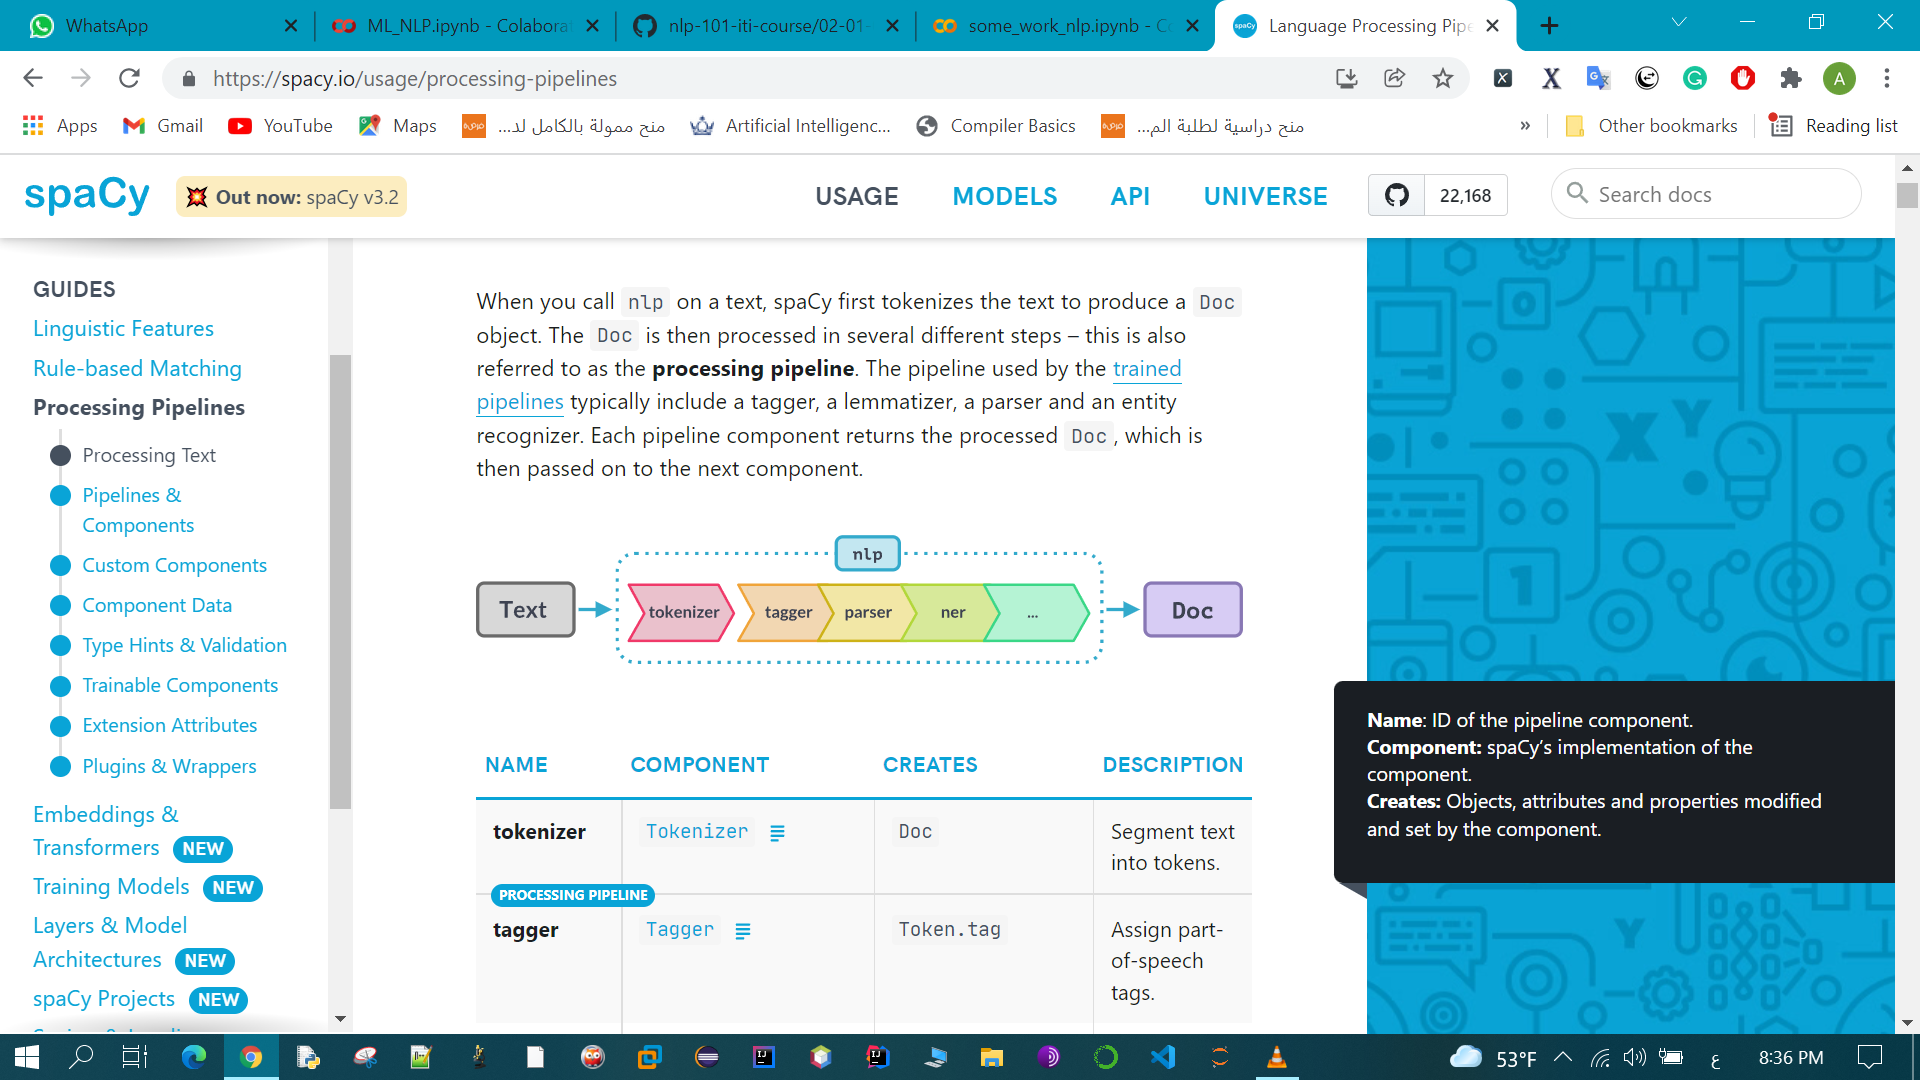

In [17]:
for i, doc in tqdm(enumerate(nlp.pipe(x_train)), total=len(x_train)):#every word vector and then avg all words in scentence
    x_train_v[i, :] = doc.vector

for i, doc in tqdm(enumerate(nlp.pipe(x_test)), total=len(x_test)):
    x_test_v[i, :] = doc.vector

  0%|          | 0/32414 [00:00<?, ?it/s]

  0%|          | 0/8104 [00:00<?, ?it/s]

In [19]:
clf = LinearSVC()
clf.fit(x_train_v, y_train)
print(classification_report(y_test, clf.predict(x_test_v)))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65      2693
           1       0.47      0.25      0.32      2350
           2       0.64      0.76      0.70      3061

    accuracy                           0.60      8104
   macro avg       0.57      0.57      0.56      8104
weighted avg       0.57      0.60      0.57      8104



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
